In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [40]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Male      502
Female    112
Name: Gender, dtype: int64


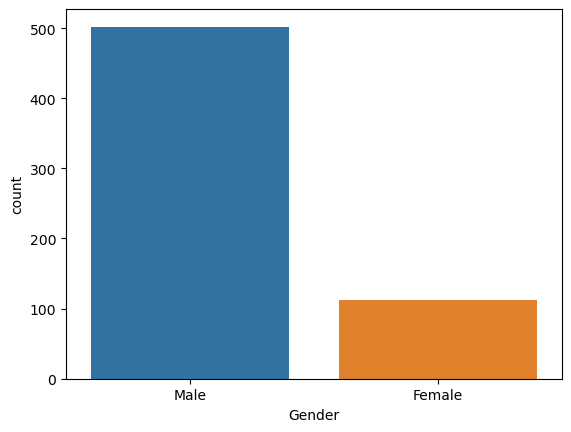

In [9]:
ax = sns.countplot(x = 'Gender', data=df)
print(df['Gender'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


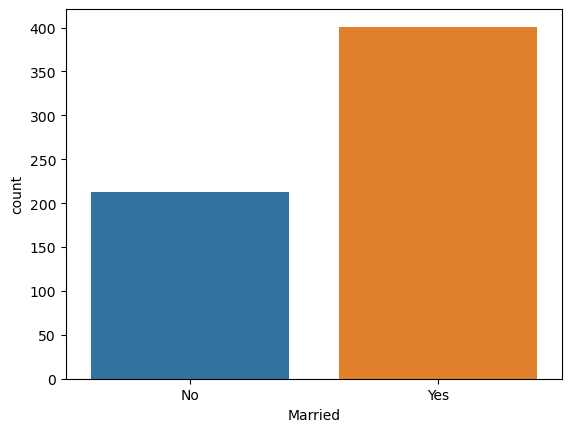

In [10]:
ax = sns.countplot(x = 'Married', data=df)
print(df['Married'].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


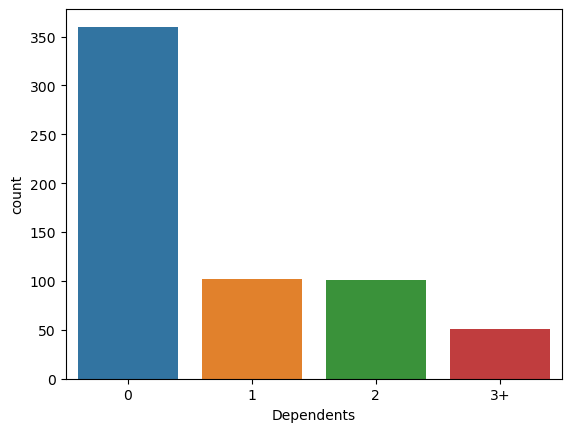

In [11]:
ax = sns.countplot(x = 'Dependents', data=df)
print(df['Dependents'].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


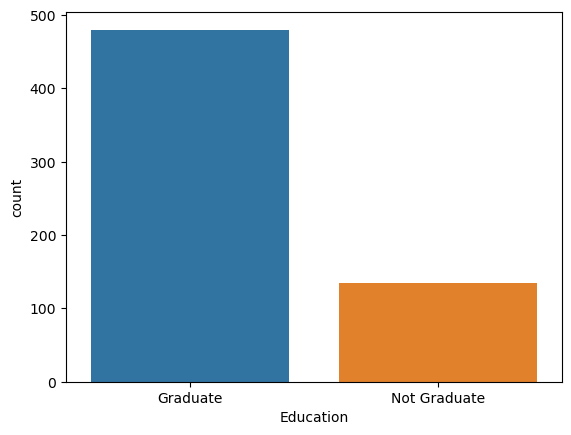

In [12]:
ax = sns.countplot(x = 'Education', data=df)
print(df['Education'].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


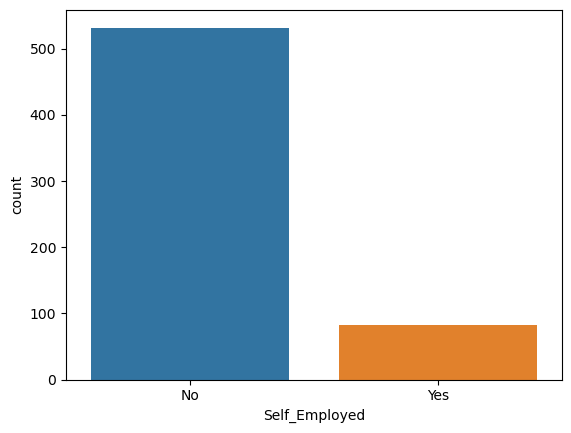

In [13]:
ax = sns.countplot(x = 'Self_Employed', data=df)
print(df['Self_Employed'].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


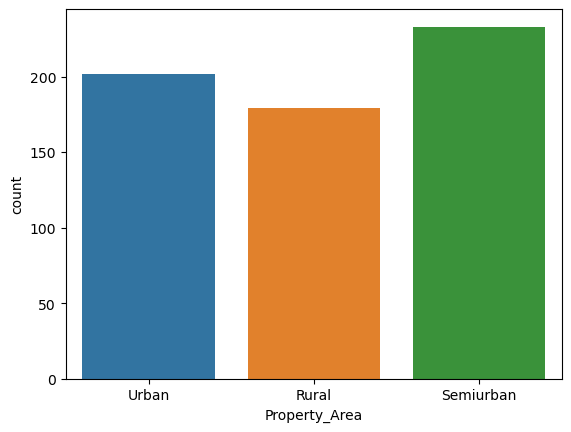

In [14]:
ax = sns.countplot(x = 'Property_Area', data=df)
print(df['Property_Area'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


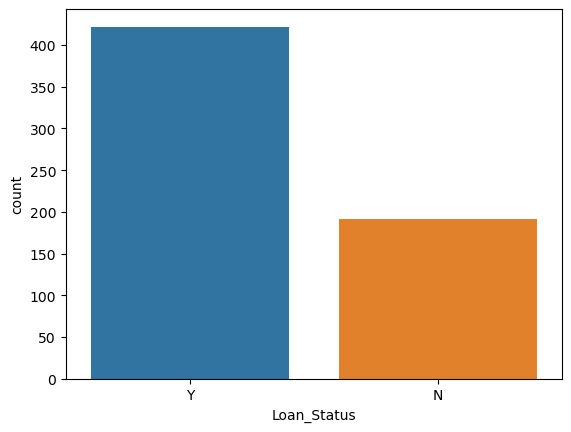

In [15]:
ax = sns.countplot(x = 'Loan_Status', data=df)
print(df['Loan_Status'].value_counts())

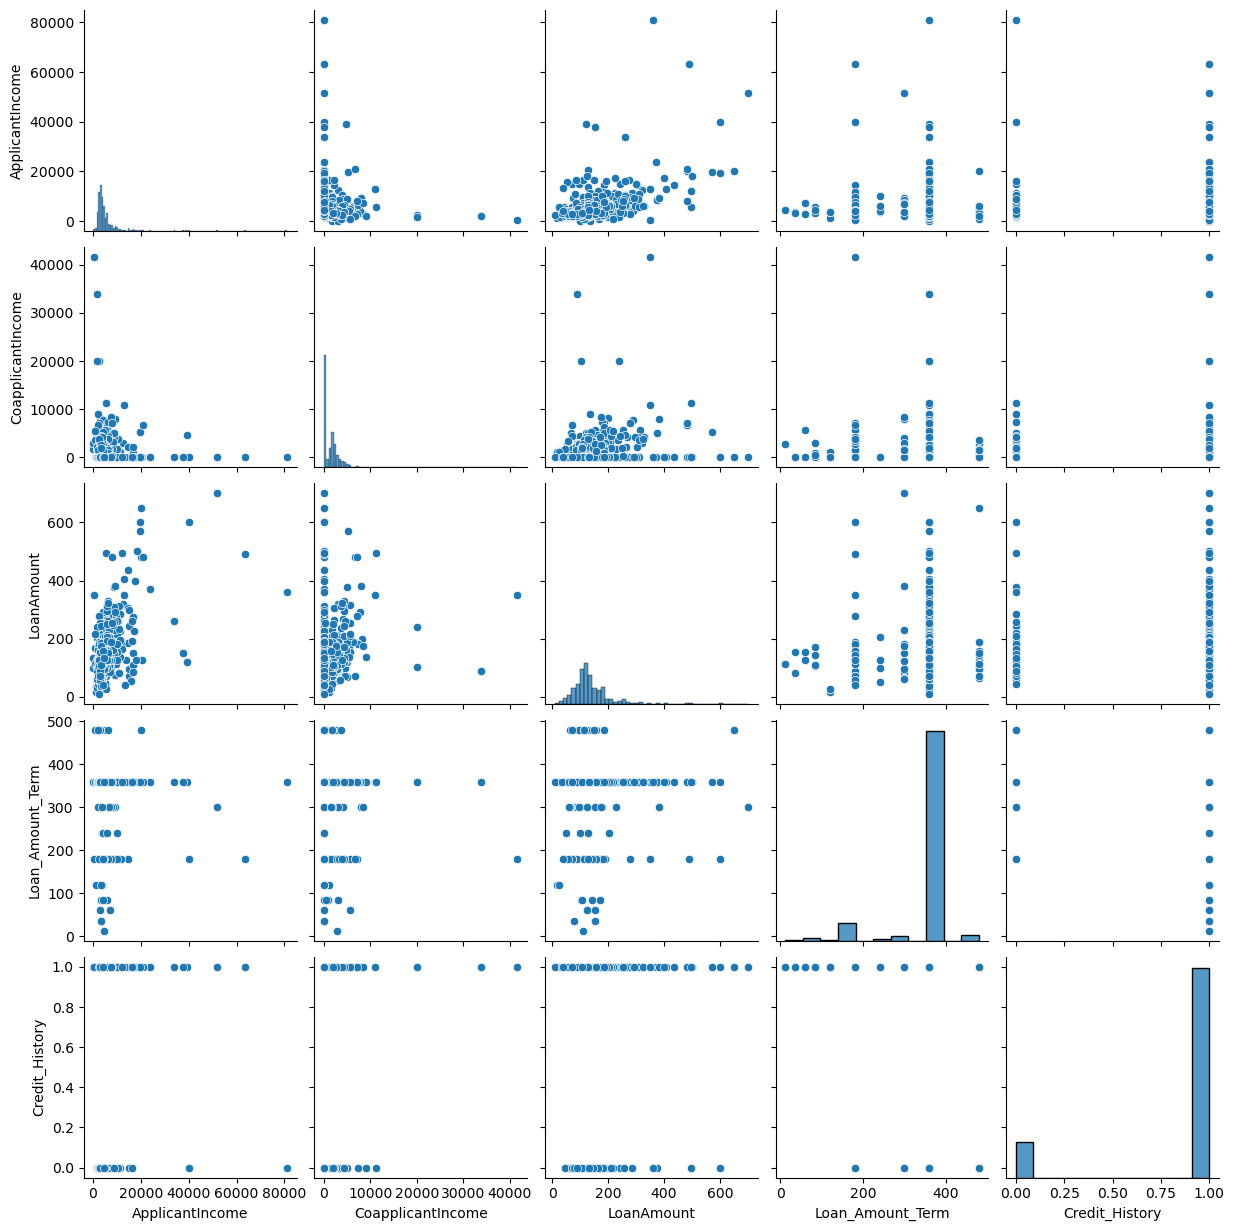

In [17]:
sns.pairplot(data=df)
plt.show()

In [19]:
df.drop('Loan_ID',axis=1,inplace=True)

In [21]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [25]:
df['Dependents'].replace({0:0,1:1,2:2,'3+':3},inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


In [31]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


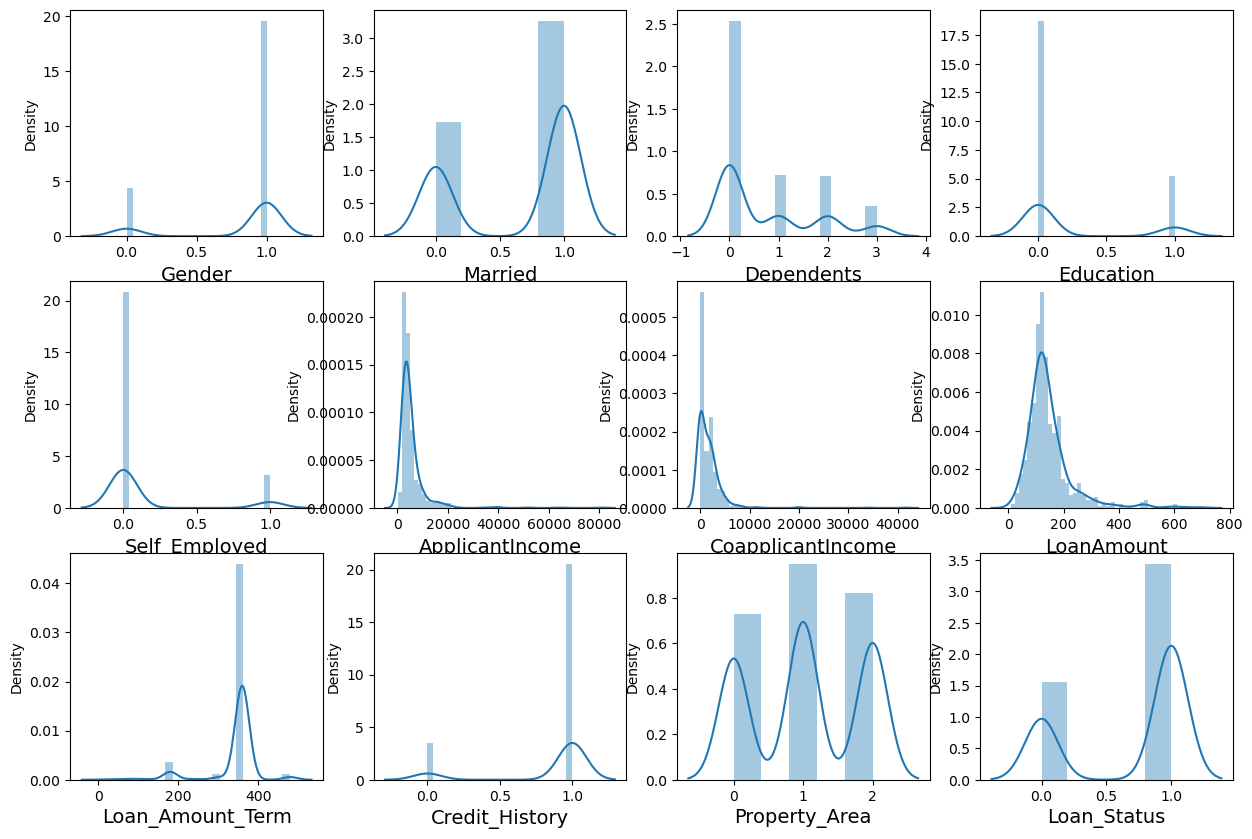

In [30]:
plt.figure(figsize=(15,10))
plotnumber=1
for col in df:
    if plotnumber<=13:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=14)
        
        
    plotnumber+=1
plt.show()

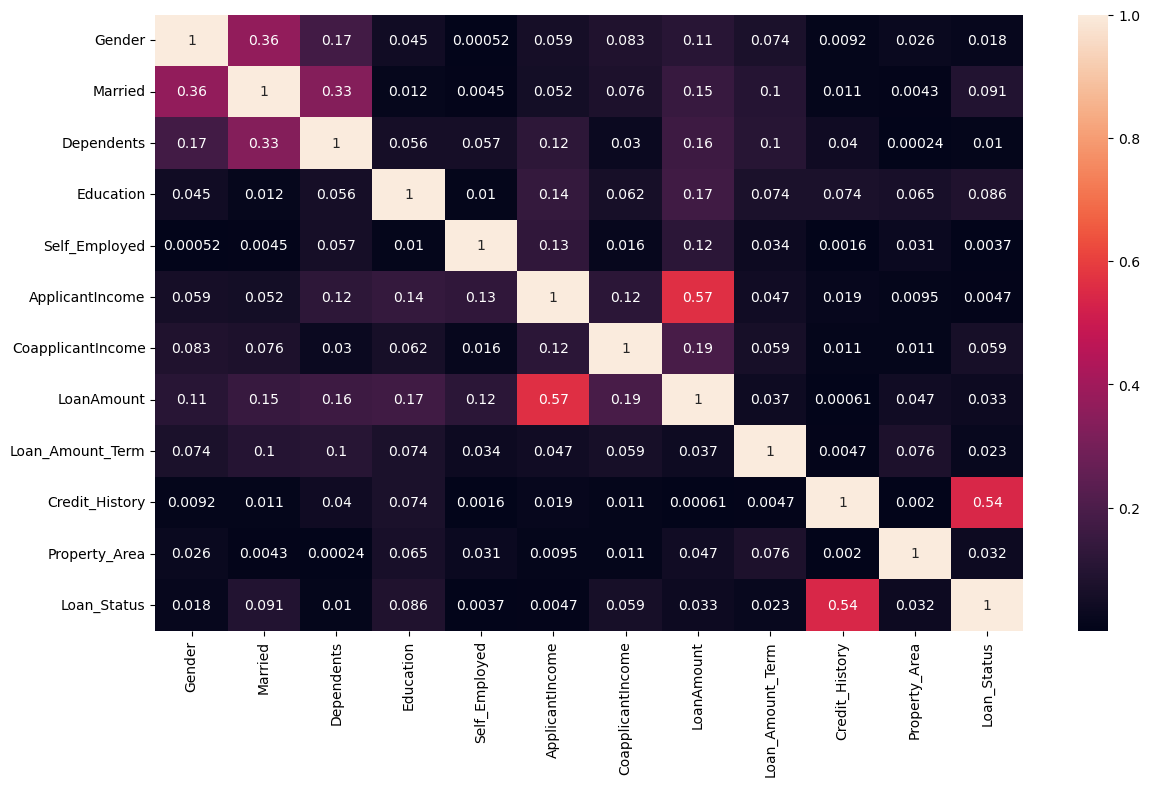

In [33]:
df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True, annot_kws={'size':10})
plt.show()

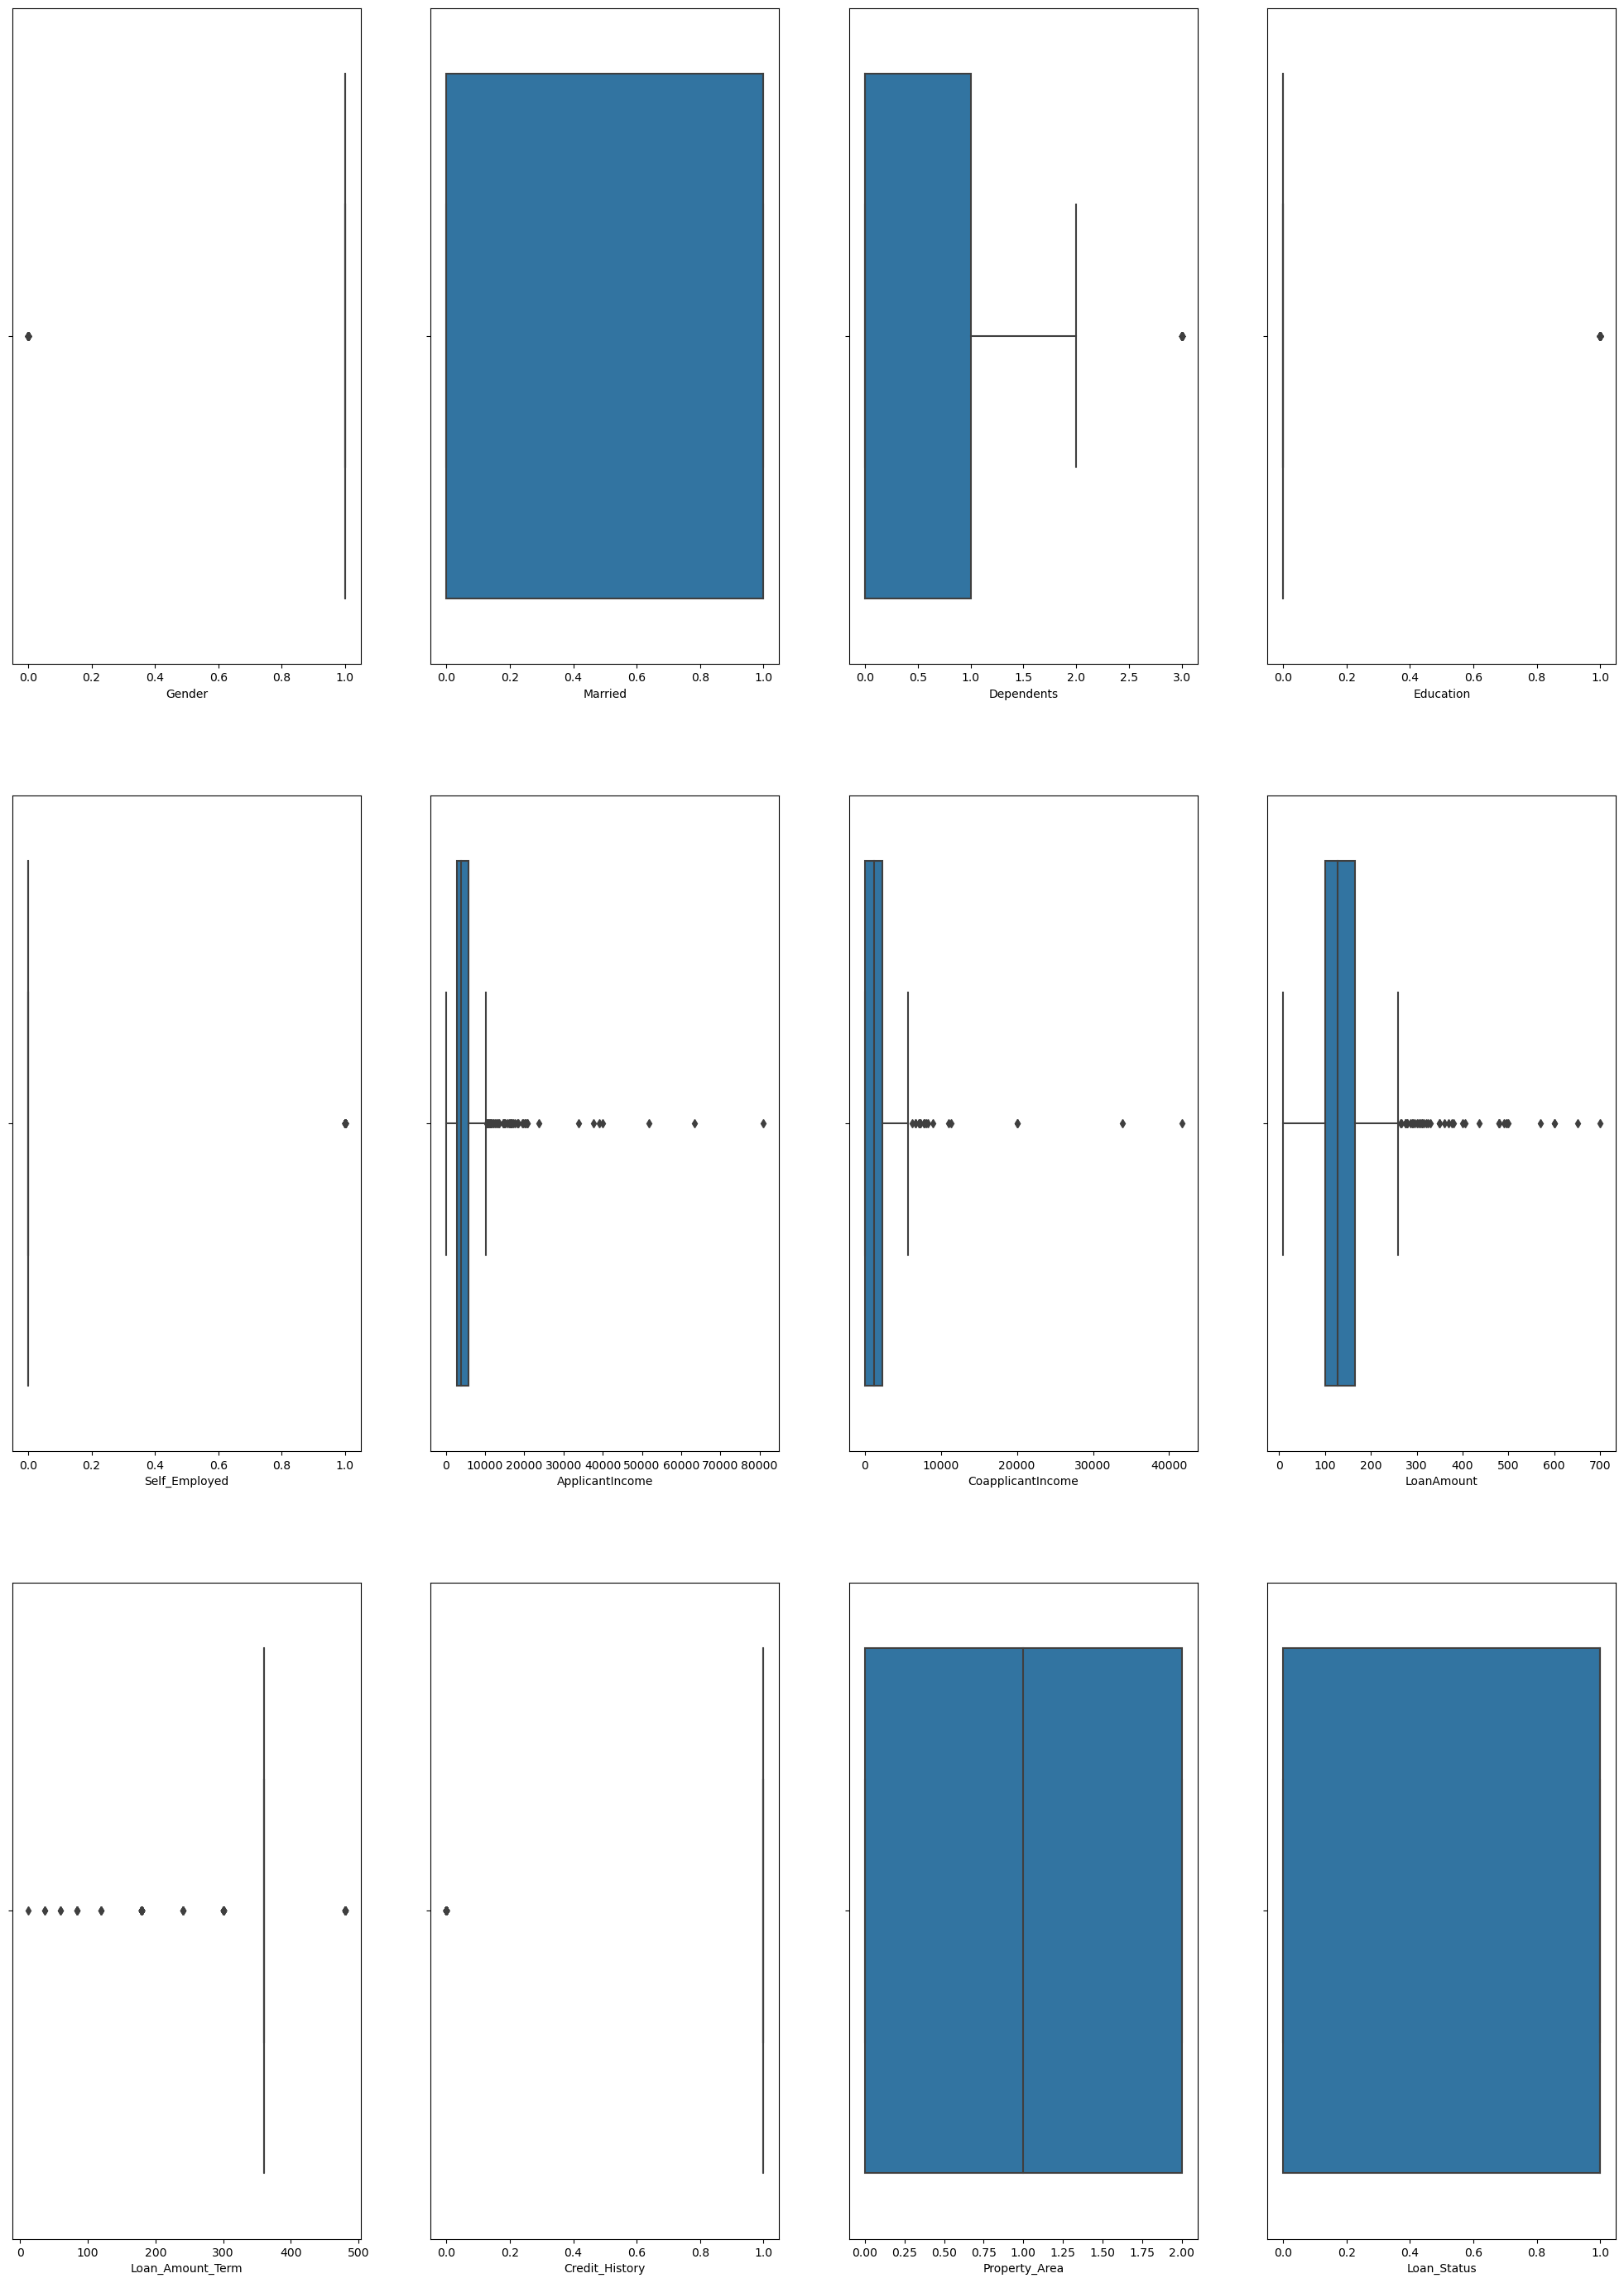

In [34]:
plt.figure(figsize=(25,35))
p=1
for i in df:
    if p<=13:
        plt.subplot(3,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
        
    p+=1
plt.show()

In [35]:
from scipy.stats import zscore
out_feature = df[['Gender','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z = np.abs(zscore(out_feature))
z

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.472343,0.737806,0.528362,0.392601,0.072991,0.554487,0.211241,0.273231,0.411733
1,0.472343,0.253470,0.528362,0.392601,0.134412,0.038732,0.211241,0.273231,0.411733
2,0.472343,0.737806,0.528362,2.547117,0.393747,0.554487,0.948996,0.273231,0.411733
3,0.472343,0.737806,1.892641,0.392601,0.462062,0.251980,0.306435,0.273231,0.411733
4,0.472343,0.737806,0.528362,0.392601,0.097728,0.554487,0.056551,0.273231,0.411733
...,...,...,...,...,...,...,...,...,...
609,2.117107,0.737806,0.528362,0.392601,0.410130,0.554487,0.889500,0.273231,0.411733
610,0.472343,2.236021,0.528362,0.392601,0.212557,0.554487,1.258378,2.522836,0.411733
611,0.472343,0.253470,0.528362,0.392601,0.437174,0.472404,1.276168,0.273231,0.411733
612,0.472343,1.244745,0.528362,0.392601,0.357064,0.554487,0.490816,0.273231,0.411733


In [36]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([5, 7, 7, 7, 4, 6, 7, 4, 6, 4, 6, 5, 6, 4, 4, 7, 7, 6, 6, 7, 4, 6,
        6, 5, 4, 5, 6, 4, 6, 7, 7, 6, 6, 6, 7, 6, 7, 5, 7, 5, 6],
       dtype=int64))

In [37]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(577, 12)

In [38]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [39]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [41]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]=np.cbrt(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])

In [42]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.862715
Loan_Amount_Term    -3.578100
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [43]:
x = df1.drop('Loan_Status',axis=1)
y = df1['Loan_Status']

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,1.205206,Gender
1,1.341284,Married
2,1.174161,Dependents
3,1.072993,Education
4,1.072247,Self_Employed
5,1.625897,ApplicantIncome
6,1.456240,CoapplicantIncome
7,1.662005,LoanAmount
8,1.059945,Loan_Amount_Term
9,1.009328,Credit_History


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [47]:
maxAccu=0
maxRS=0
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8908045977011494 on Random_state 261


In [48]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30, random_state=261)

In [49]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n==================Train Result=====================')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n==================Test Result======================')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        
        
        print('\n Classification Report', classification_report(y_test,pred,digits=2))

In [50]:
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [51]:
metric_score(Lr,x_train,x_test,y_train,y_test, train = True)
metric_score(Lr,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 78.66%

==================Test Result======================
Accuracy Score: 89.08%

 Classification Report               precision    recall  f1-score   support

           0       0.96      0.59      0.73        44
           1       0.88      0.99      0.93       130

    accuracy                           0.89       174
   macro avg       0.92      0.79      0.83       174
weighted avg       0.90      0.89      0.88       174



In [52]:
Dt = DecisionTreeClassifier()
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
metric_score(Dt,x_train,x_test,y_train,y_test, train = True)
metric_score(Dt,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 100.00%

==================Test Result======================
Accuracy Score: 72.41%

 Classification Report               precision    recall  f1-score   support

           0       0.47      0.66      0.55        44
           1       0.87      0.75      0.80       130

    accuracy                           0.72       174
   macro avg       0.67      0.70      0.67       174
weighted avg       0.77      0.72      0.74       174



In [54]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 80.15%

==================Test Result======================
Accuracy Score: 87.36%

 Classification Report               precision    recall  f1-score   support

           0       0.84      0.61      0.71        44
           1       0.88      0.96      0.92       130

    accuracy                           0.87       174
   macro avg       0.86      0.79      0.81       174
weighted avg       0.87      0.87      0.87       174



In [56]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
metric_score(RFC,x_train,x_test,y_train,y_test, train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 100.00%

==================Test Result======================
Accuracy Score: 84.48%

 Classification Report               precision    recall  f1-score   support

           0       0.73      0.61      0.67        44
           1       0.88      0.92      0.90       130

    accuracy                           0.84       174
   macro avg       0.80      0.77      0.78       174
weighted avg       0.84      0.84      0.84       174



In [58]:
Abc = AdaBoostClassifier()
Abc.fit(x_train,y_train)

AdaBoostClassifier()

In [59]:
metric_score(Abc,x_train,x_test,y_train,y_test, train = True)
metric_score(Abc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 83.13%

==================Test Result======================
Accuracy Score: 86.78%

 Classification Report               precision    recall  f1-score   support

           0       0.82      0.61      0.70        44
           1       0.88      0.95      0.92       130

    accuracy                           0.87       174
   macro avg       0.85      0.78      0.81       174
weighted avg       0.86      0.87      0.86       174



In [60]:
Gbc = GradientBoostingClassifier()
Gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [61]:
metric_score(Gbc,x_train,x_test,y_train,y_test, train = True)
metric_score(Gbc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 90.07%

==================Test Result======================
Accuracy Score: 86.21%

 Classification Report               precision    recall  f1-score   support

           0       0.78      0.64      0.70        44
           1       0.88      0.94      0.91       130

    accuracy                           0.86       174
   macro avg       0.83      0.79      0.81       174
weighted avg       0.86      0.86      0.86       174



In [62]:
Etc = ExtraTreesClassifier()
Etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [63]:
metric_score(Etc,x_train,x_test,y_train,y_test, train = True)
metric_score(Etc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 100.00%

==================Test Result======================
Accuracy Score: 79.31%

 Classification Report               precision    recall  f1-score   support

           0       0.61      0.52      0.56        44
           1       0.85      0.88      0.86       130

    accuracy                           0.79       174
   macro avg       0.73      0.70      0.71       174
weighted avg       0.78      0.79      0.79       174



In [64]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [65]:
metric_score(bc,x_train,x_test,y_train,y_test, train = True)
metric_score(bc,x_train,x_test,y_train,y_test,train= False)


==================Train Result=====================
Accuracy Score: 98.01%

==================Test Result======================
Accuracy Score: 81.61%

 Classification Report               precision    recall  f1-score   support

           0       0.64      0.64      0.64        44
           1       0.88      0.88      0.88       130

    accuracy                           0.82       174
   macro avg       0.76      0.76      0.76       174
weighted avg       0.82      0.82      0.82       174



In [66]:
score = cross_val_score(Lr,x,y)
print(score)
print(score.mean())

[0.81034483 0.79310345 0.79130435 0.86086957 0.82608696]
0.8163418290854573


In [67]:
score = cross_val_score(Dt,x,y)
print(score)
print(score.mean())

[0.75       0.70689655 0.69565217 0.77391304 0.73913043]
0.7331184407796101


In [68]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())

[0.62931034 0.63793103 0.62608696 0.5826087  0.6173913 ]
0.6186656671664168


In [69]:
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())

[0.78448276 0.77586207 0.79130435 0.84347826 0.79130435]
0.7972863568215891


In [70]:
score = cross_val_score(Abc,x,y)
print(score)
print(score.mean())

[0.75       0.75862069 0.7826087  0.82608696 0.8       ]
0.7834632683658171


In [71]:
score = cross_val_score(Gbc,x,y)
print(score)
print(score.mean())

[0.77586207 0.76724138 0.77391304 0.83478261 0.8173913 ]
0.7938380809595202


In [72]:
score = cross_val_score(Etc,x,y)
print(score)
print(score.mean())

[0.77586207 0.78448276 0.76521739 0.79130435 0.77391304]
0.7781559220389804


In [73]:
score = cross_val_score(bc,x,y)
print(score)
print(score.mean())

[0.82758621 0.75862069 0.77391304 0.7826087  0.74782609]
0.7781109445277361


In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [76]:
gscv = GridSearchCV(LogisticRegression(),param_grid,cv=5,verbose=True,n_jobs=-1)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [77]:
gscv.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

In [78]:
model = LogisticRegression(C=0.0001,max_iter=100,penalty='none',solver='lbfgs')
model.fit(x_train,y_train)
pred = model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

89.08045977011494


In [79]:
import joblib
joblib.dump(model,'Loan_Application.pkl')

['Loan_Application.pkl']